In [1]:
from src.neural_networks.get_data import get_tf_data, stack_1d_features, normalize_1d_features_with_mean_std, normalize_1d_features
from src.neural_networks.nn_forecast import NNForecast
from src.visualization.twcrpss_plot import make_twcrpss_plot_tf
from src.visualization.brier_score import make_brier_skill_plot_tf
from src.visualization.pit import make_cpit_diagram_tf
from src.training.training import load_model

import tensorflow as tf
import numpy as np

2024-05-10 12:29:20.431724: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 12:29:20.434073: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 12:29:20.465032: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 12:29:26.356352: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

features_names = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

features_names_dict = {name: 1 for name in features_names}

features_names_dict['wind_speed'] = 15

ignore = ['229', '285', '323']

train_data = get_tf_data([1,2], features_names_dict, ignore=ignore)

train_data = train_data.map(lambda x, y: stack_1d_features(x, y))

train_data, mean, std = normalize_1d_features(train_data)

train_data = train_data.shuffle(len(train_data))

train_data = train_data.batch(32)

train_data = train_data.prefetch(tf.data.experimental.AUTOTUNE)

2024-05-10 12:30:05.778488: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-10 12:30:10.716036: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [3]:
fold = 3
test_data = get_tf_data([fold], features_names_dict, ignore=ignore)

test_data = test_data.map(lambda x, y: stack_1d_features(x, y))

test_data = normalize_1d_features_with_mean_std(test_data, mean, std)

test_data = test_data.batch(len(test_data))

test_data = test_data.prefetch(tf.data.experimental.AUTOTUNE)

In [4]:

filepath = '/net/pc200239/nobackup/users/hakvoort/models/conv_nn/test_crps'

model = NNForecast.my_load(filepath, train_data)

filepath = '/net/pc200239/nobackup/users/hakvoort/models/conv_nn/test_crps2'

model2 = NNForecast.my_load(filepath, train_data)

folder = '/net/pc200239/nobackup/users/hakvoort/models/emos/'

base_model = load_model(folder + 'trunc_normal/tn_crps__epochs600_folds_1_2_mean0_1_2_3_4_std0_1_2_3_4_.pkl')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step


/usr/people/hakvoort/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 142 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


ValueError: Argument `learning_rate` should be float, or an instance of LearningRateSchedule, or a callable (that takes in the current iteration value and returns the corresponding learning rate value). Received instead: learning_rate=0.029999999329447746

In [5]:
print(model.CRPS(test_data, 10000).numpy())
print(model2.CRPS(test_data, 10000).numpy())

244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


2024-05-10 11:19:14.805958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


0.889014
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


2024-05-10 11:19:17.082724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


0.88941634


In [6]:
mymodels = {'model2': model2, 'model': model}

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


2024-05-10 11:19:19.142890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


2024-05-10 11:19:23.384596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


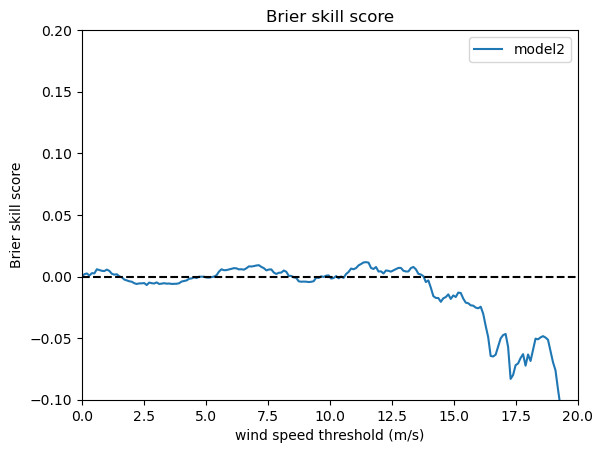

In [7]:
values = np.linspace(0, 20, 200)
ylim = [-0.1, 0.2]
make_brier_skill_plot_tf(model, mymodels, test_data, values, ylim)



 13/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


2024-05-10 11:19:27.856899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


2024-05-10 11:19:40.834018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


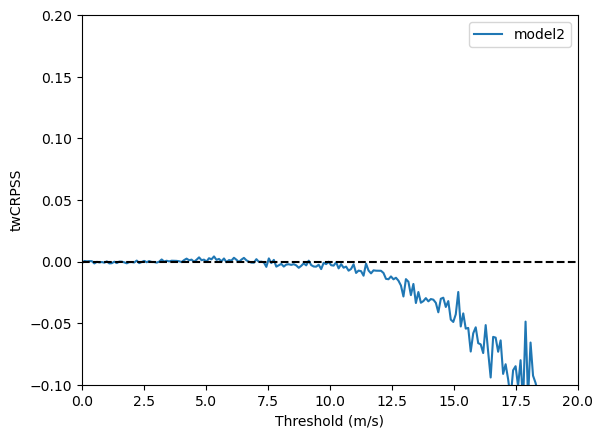

In [8]:
make_twcrpss_plot_tf(model, mymodels, test_data, values, ylim)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

2024-05-10 11:32:57.483042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
probabilities contain nan
There are 104 values in the PIT diagram


2024-05-10 11:32:57.697387: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


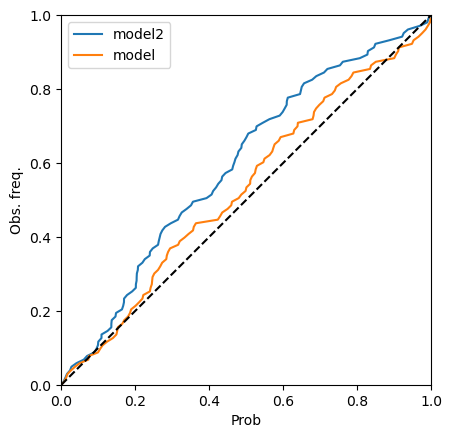

In [13]:
t = 15
mymodels['model'] = model
make_cpit_diagram_tf(mymodels, test_data, t)